# Luke Harvey T. Umpad BSIT 3C

In [10]:
# UserWarning: KMeans is known to have a memory leak on Windows with MKL when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
import os
os.environ["OMP_NUM_THREADS"] = "1" 

import numpy as np
import pandas as pd
from scipy import stats
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import torch
import matplotlib.pyplot as plt

In [11]:
# 1) Generate synthetic data using sklearn's make_blobs
X, y = make_blobs(
    n_samples=200,
    centers=3,
    n_features=2,
    random_state=42
)

# Pandas
pds = pd.DataFrame(X, columns=["Feature1", "Feature2"])
pds["TrueCluster"] = y
pds.head()

,Feature1,Feature2,TrueCluster
0,6.505653,2.447003,1
1,-5.128943,9.836189,0
2,-6.891874,-7.777364,2
3,-8.327712,-8.287573,2
4,-7.468992,-6.030507,2


In [12]:
# 2) Initialize & fit K-means
kmeans = KMeans(n_clusters=3, random_state=42)
pds["PredictedCluster"] = kmeans.fit_predict(pds[["Feature1", "Feature2"]])
pds.head()

,Feature1,Feature2,TrueCluster,PredictedCluster
0,6.505653,2.447003,1,2
1,-5.128943,9.836189,0,0
2,-6.891874,-7.777364,2,1
3,-8.327712,-8.287573,2,1
4,-7.468992,-6.030507,2,1


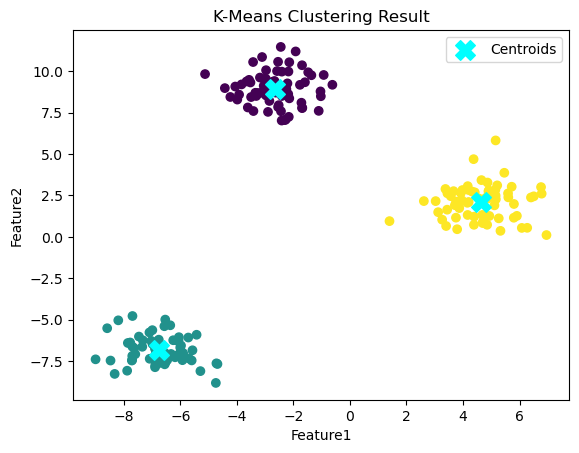

In [13]:
# 3) Visualize using matplotlib
plt.scatter(pds["Feature1"], pds["Feature2"], c=pds["PredictedCluster"])
plt.title("K-Means Clustering Result")
plt.xlabel("Feature1")
plt.ylabel("Feature2")

# Centeroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], 
            c="cyan", s=200, marker="X", label="Centroids")

plt.legend()
plt.show()